<a href="https://colab.research.google.com/github/blondedman/clustering-comparisons/blob/main/clustering_agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agglomerative Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Necessary Data Preprocessing

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder1 = LabelEncoder()
data['Weekend'] = encoder1.fit_transform(data['Weekend'])
data['Revenue'] = encoder1.fit_transform(data['Revenue'])

encoder2 = LabelEncoder()
data['VisitorType'] = encoder2.fit_transform(data['VisitorType'])

encoder3 = OneHotEncoder()
data['Month'] = encoder2.fit_transform(data['Month'])

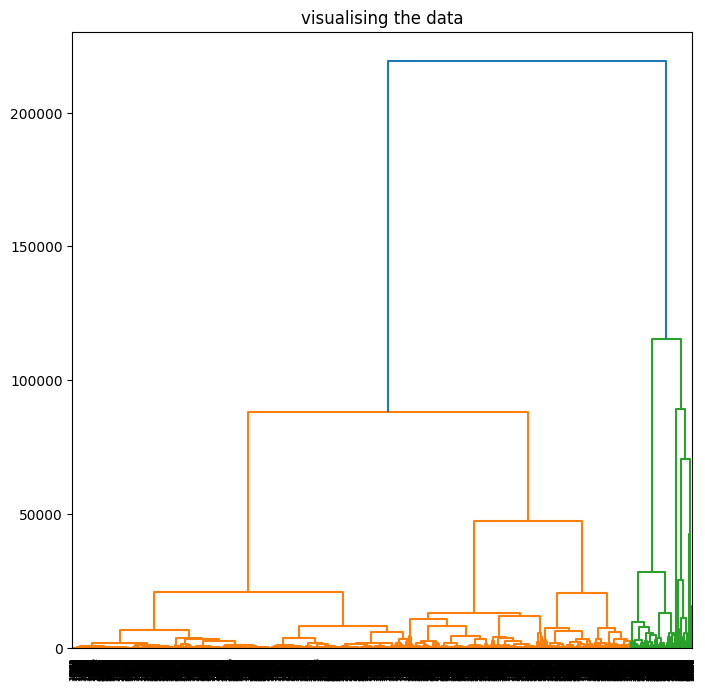

In [5]:
plt.figure(figsize =(8, 8))
plt.title('visualising the data')
dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

# Additional Data Preprocessing


## No Data Preprocessing

In [6]:
models = [AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward'),
          AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward'),
          AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')]

clusters = [3, 5, 7]

In [7]:
for i in range(len(models)):
  labels = models[i].fit_predict(data)
  print(f'Silhouette Score: {silhouette_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.691553900661933 for number of clusters: 3
Davies-Bouldin Score: 0.5982979571254957 for number of clusters: 3
Calinski-Harabasz Score: 12478.434032549805 for number of clusters: 3

Silhouette Score: 0.5556953722995512 for number of clusters: 5
Davies-Bouldin Score: 0.5693875346169361 for number of clusters: 5
Calinski-Harabasz Score: 16298.901700253953 for number of clusters: 5

Silhouette Score: 0.5396439331651564 for number of clusters: 7
Davies-Bouldin Score: 0.5950891367530212 for number of clusters: 7
Calinski-Harabasz Score: 23575.84893512541 for number of clusters: 7



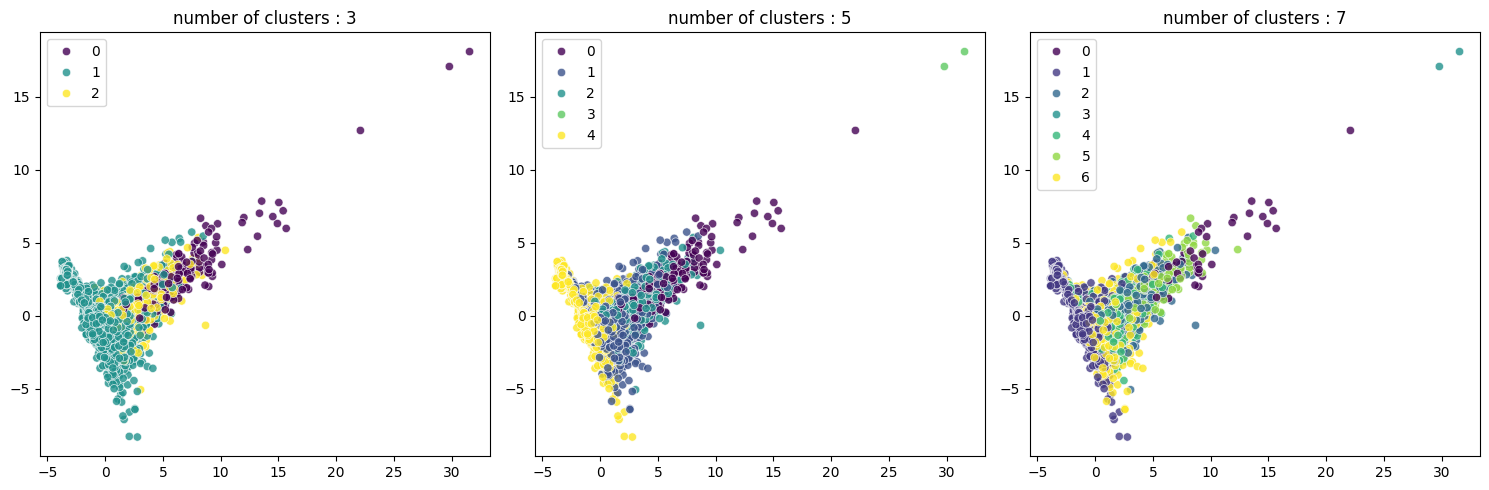

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Standardization & PCA

In [9]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

pca = PCA(n_components = 2)
new_data = pca.fit_transform(new_data)

In [10]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette Score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.46296339678445475 for number of clusters: 3
Davies-Bouldin Score: 0.7303037718206703 for number of clusters: 3
Calinski-Harabasz Score: 7371.24316322706 for number of clusters: 3

Silhouette Score: 0.43034246849616875 for number of clusters: 5
Davies-Bouldin Score: 0.6526718100348432 for number of clusters: 5
Calinski-Harabasz Score: 9537.93056833767 for number of clusters: 5

Silhouette Score: 0.4234662215622552 for number of clusters: 7
Davies-Bouldin Score: 0.6582765716955652 for number of clusters: 7
Calinski-Harabasz Score: 9730.865740616833 for number of clusters: 7



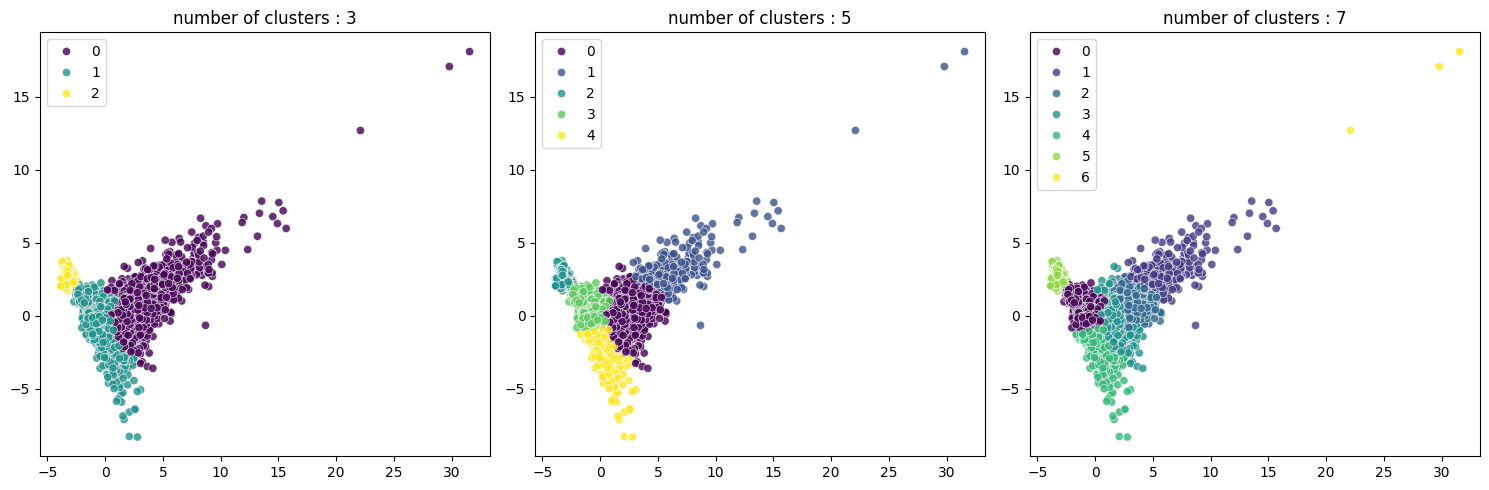

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = new_data[:, 0], y = new_data[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Min-Max Scaling & Outlier removal

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_data = scaler.fit_transform(new_data)

In [14]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette Score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.15975568558107497 for number of clusters: 3
Davies-Bouldin Score: 2.0536414200174975 for number of clusters: 3
Calinski-Harabasz Score: 165.7099729869763 for number of clusters: 3

Silhouette Score: 0.15123657776323662 for number of clusters: 5
Davies-Bouldin Score: 1.6722130224882594 for number of clusters: 5
Calinski-Harabasz Score: 165.97788720897117 for number of clusters: 5

Silhouette Score: 0.14683099235778402 for number of clusters: 7
Davies-Bouldin Score: 1.5533835758425465 for number of clusters: 7
Calinski-Harabasz Score: 146.05207808564745 for number of clusters: 7



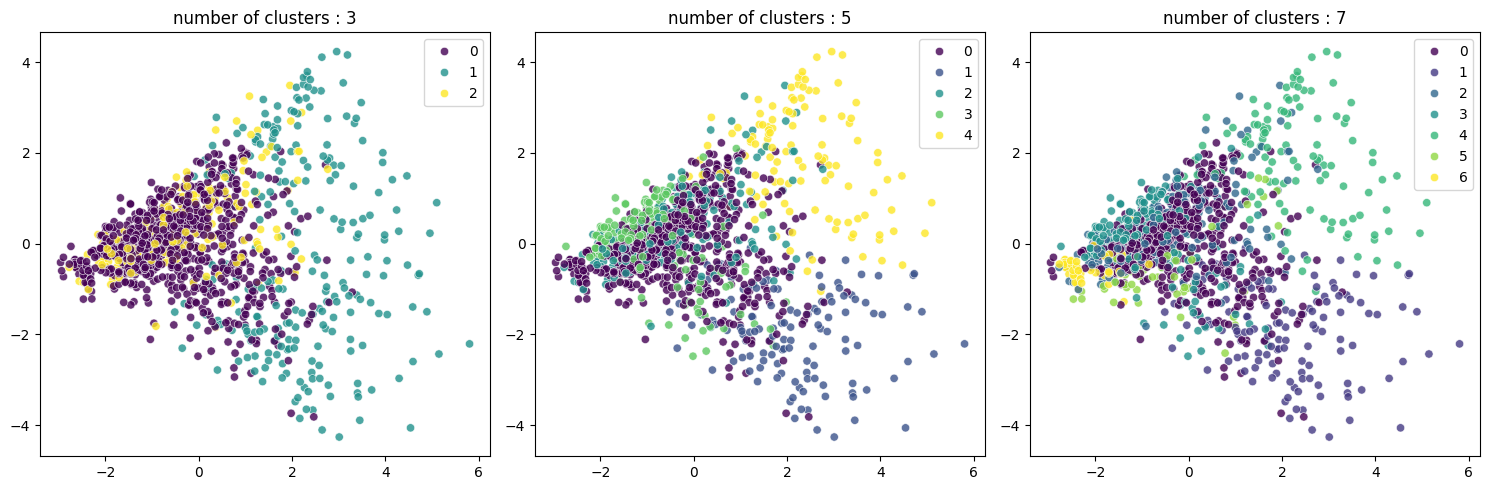

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Log Transformation & Normalization

In [16]:
new_data = np.log1p(data + 1)

In [17]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
new_data = normalizer.fit_transform(new_data)

In [18]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette score: 0.34938717607315584 for number of clusters: 3
Davies-Bouldin score: 0.9994942315016194 for number of clusters: 3
Calinski-Harabasz score: 6012.73304010969 for number of clusters: 3

Silhouette score: 0.3511767148826508 for number of clusters: 5
Davies-Bouldin score: 1.033831428852526 for number of clusters: 5
Calinski-Harabasz score: 5559.906304552884 for number of clusters: 5

Silhouette score: 0.23738606748955515 for number of clusters: 7
Davies-Bouldin score: 1.3620679922859371 for number of clusters: 7
Calinski-Harabasz score: 4791.528019325383 for number of clusters: 7



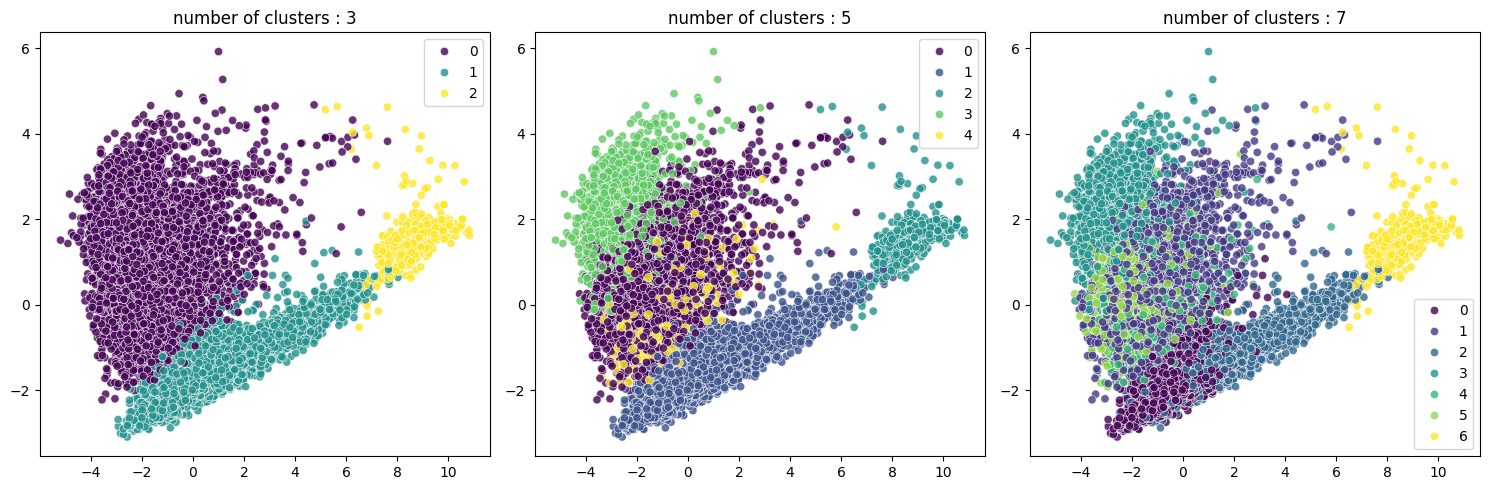

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Feature Selection & Discretization

In [20]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold = 0.01)
new_data = var_thresh.fit_transform(data)

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
new_data = discretizer.fit_transform(new_data)

In [23]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette Score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.2690105651408133 for number of clusters: 3
Davies-Bouldin Score: 1.8414536539597233 for number of clusters: 3
Calinski-Harabasz Score: 2387.6626231098658 for number of clusters: 3

Silhouette Score: 0.23147404678687417 for number of clusters: 5
Davies-Bouldin Score: 1.468286639106306 for number of clusters: 5
Calinski-Harabasz Score: 2544.862525363688 for number of clusters: 5

Silhouette Score: 0.273320378266526 for number of clusters: 7
Davies-Bouldin Score: 1.4218110191848334 for number of clusters: 7
Calinski-Harabasz Score: 2358.0036197211934 for number of clusters: 7



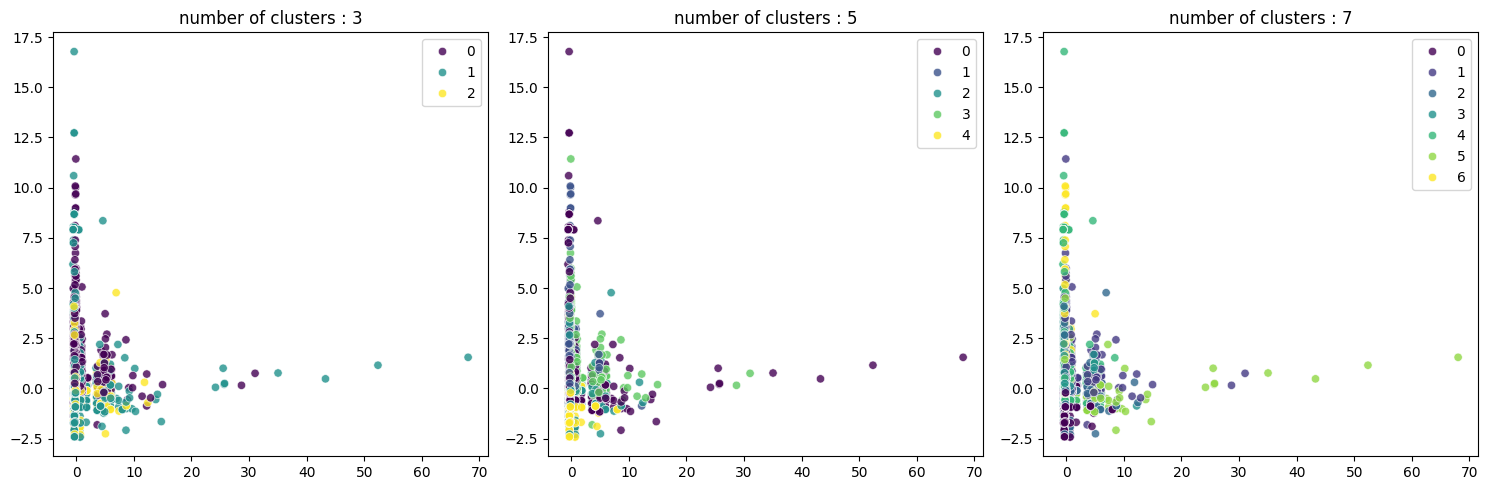

In [24]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Robust Scaling & Feature Engineering

In [25]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
new_data = scaler.fit_transform(data)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
new_data = poly.fit_transform(new_data)

In [27]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette Score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.9762098331278336 for number of clusters: 3
Davies-Bouldin Score: 0.4796853292604193 for number of clusters: 3
Calinski-Harabasz Score: 31867.57613365216 for number of clusters: 3

Silhouette Score: 0.9719299655401241 for number of clusters: 5
Davies-Bouldin Score: 0.4394260353769076 for number of clusters: 5
Calinski-Harabasz Score: 51914.01724484529 for number of clusters: 5

Silhouette Score: 0.9549538301858402 for number of clusters: 7
Davies-Bouldin Score: 0.44866262639882704 for number of clusters: 7
Calinski-Harabasz Score: 71670.76798005473 for number of clusters: 7



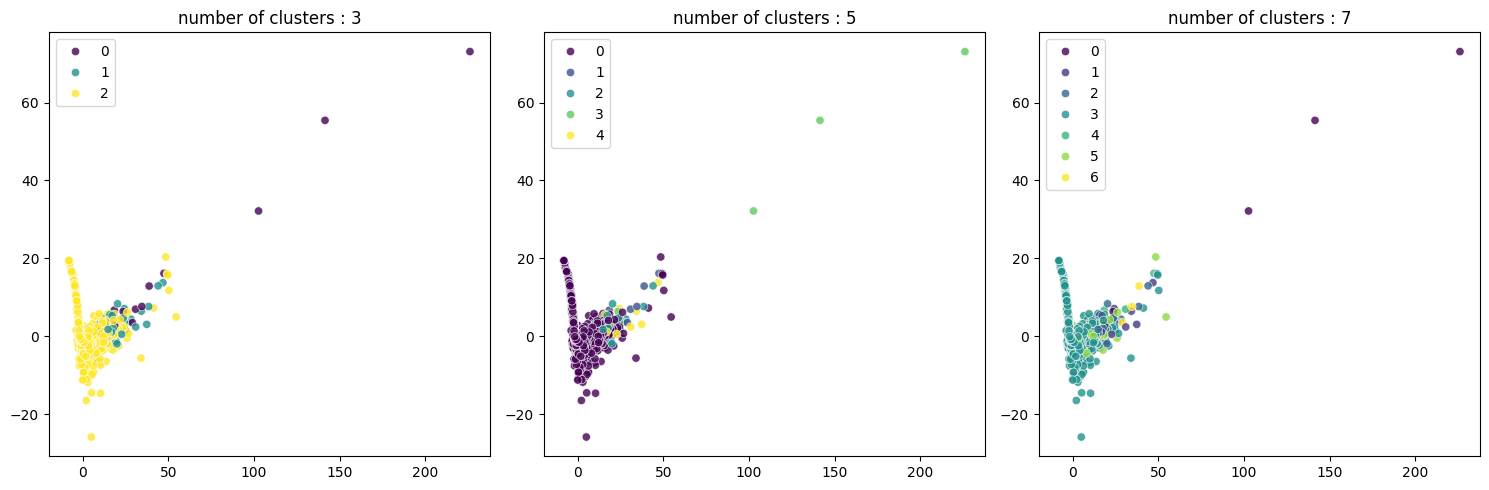

In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()